In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Relationship between STR locus size (i.e. # units) in reference and variability in samples

In [2]:
df = pd.read_csv("1000g_tral_panel_purity.tsv", sep="\t", header=0)
df

,chrom,start,end,motif,motif_len,ref_cn,purity,longest_p_stretch,call_rate,diffs_less,diffs_add,diffs_tot,avg_diffs
0,chr1,64096,64101,TG,2,3.0,1.0,3,0.9,0.0,0.0,0.0,0.0
1,chr1,64165,64176,CACATA,6,2.0,1.0,2,0.8,0.0,0.0,0.0,0.0
2,chr1,64174,64181,AT,2,4.0,1.0,4,1.0,0.0,0.0,0.0,0.0
3,chr1,64215,64220,ATA,3,2.0,1.0,2,1.0,0.0,0.0,0.0,0.0
4,chr1,64233,64240,AATT,4,2.0,1.0,2,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258047,chrY,22344566,22344571,TCC,3,2.0,1.0,2,0.2,0.0,0.0,0.0,0.0
21258048,chrY,22344632,22344639,TCCA,4,2.0,1.0,2,0.2,0.0,0.0,0.0,0.0
21258049,chrY,22344677,22344685,GGA,3,3.0,1.0,3,0.2,0.0,0.0,0.0,0.0
21258050,chrY,22344717,22344726,TTCTG,5,2.0,1.0,2,0.1,0.0,0.0,0.0,0.0


In [20]:
pearsonr(df['ref_cn'], df['avg_diffs'])

(0.40942056478246613, 0.0)

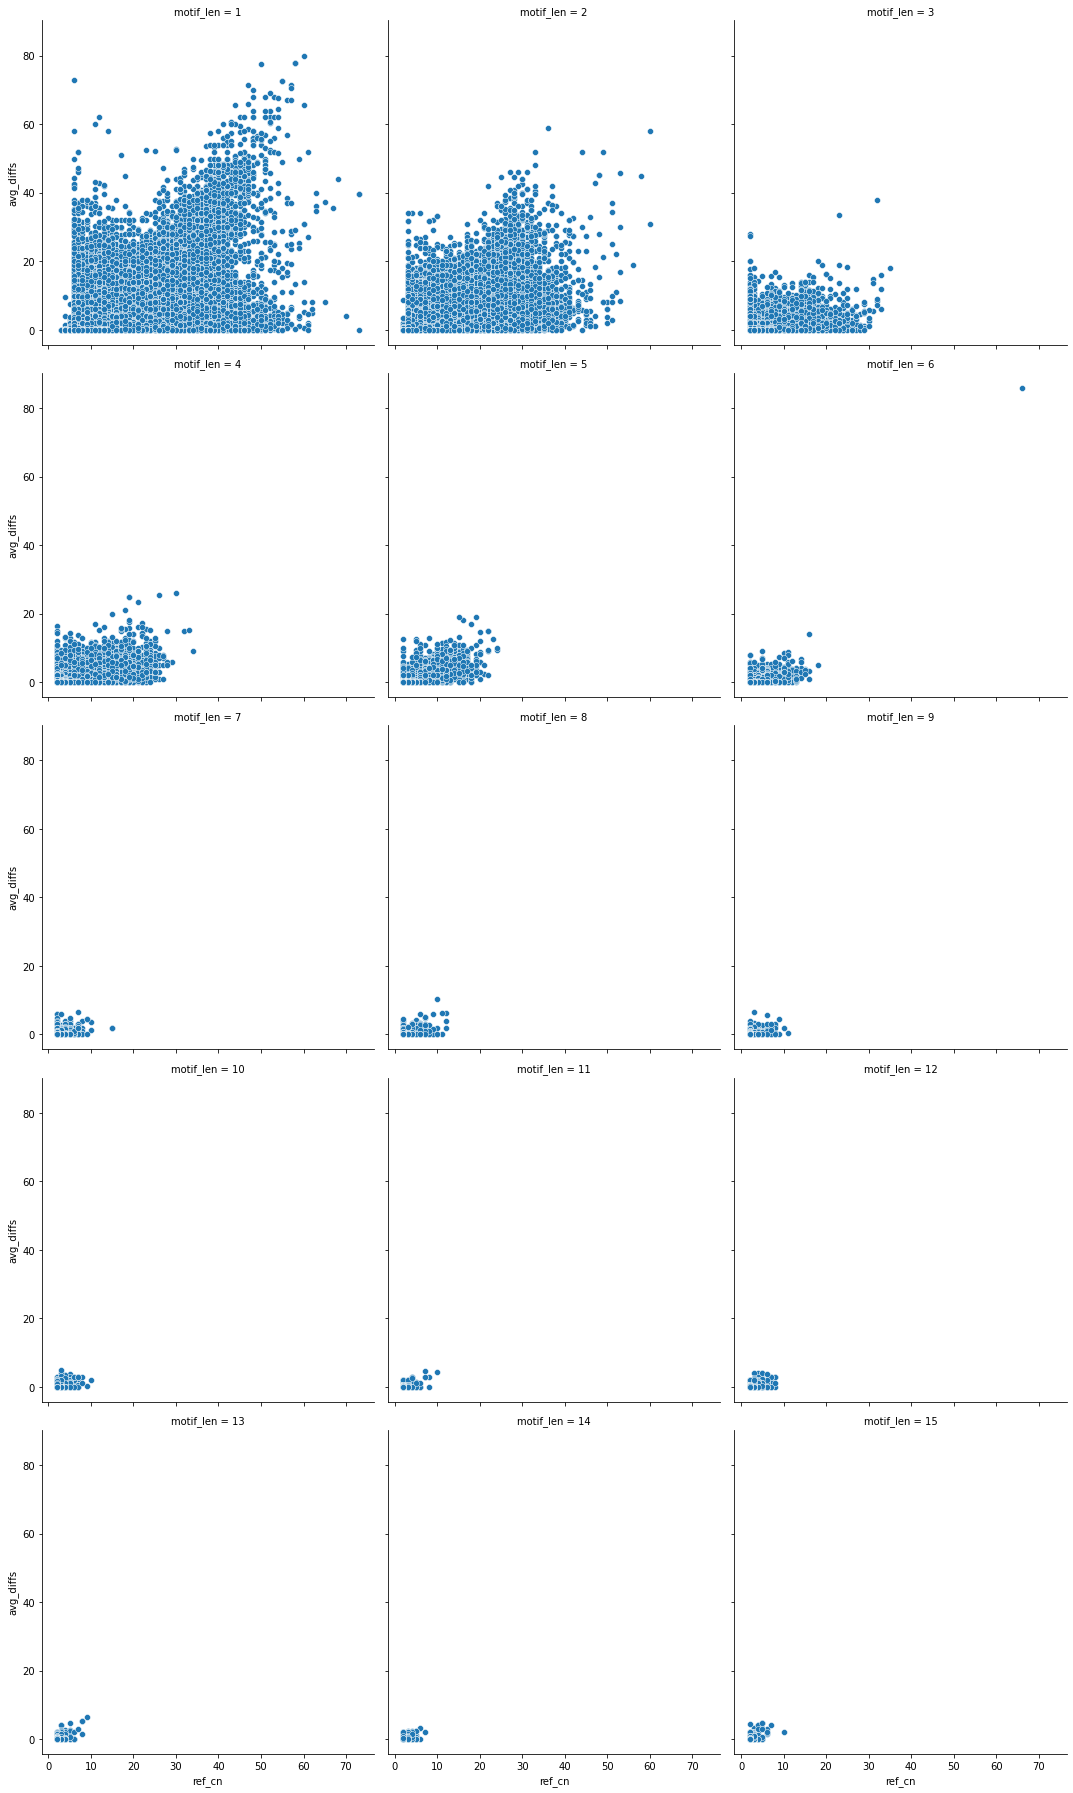

In [3]:
sns.relplot(x="ref_cn", y="avg_diffs", col="motif_len", col_wrap=3, data=df)

## Effect of STR purity on variability

In [8]:
str_df = df[df['motif_len'] <= 6]
str_df["is_pure"] = np.where(str_df["purity"] == 1.0, True, False)
str_df

/tmp/ipykernel_6948/3273389886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  str_df["is_pure"] = np.where(str_df["purity"] == 1.0, True, False)


,chrom,start,end,motif,motif_len,ref_cn,purity,longest_p_stretch,call_rate,diffs_less,diffs_add,diffs_tot,avg_diffs,is_pure
0,chr1,64096,64101,TG,2,3.0,1.0,3,0.9,0.0,0.0,0.0,0.0,True
1,chr1,64165,64176,CACATA,6,2.0,1.0,2,0.8,0.0,0.0,0.0,0.0,True
2,chr1,64174,64181,AT,2,4.0,1.0,4,1.0,0.0,0.0,0.0,0.0,True
3,chr1,64215,64220,ATA,3,2.0,1.0,2,1.0,0.0,0.0,0.0,0.0,True
4,chr1,64233,64240,AATT,4,2.0,1.0,2,1.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258047,chrY,22344566,22344571,TCC,3,2.0,1.0,2,0.2,0.0,0.0,0.0,0.0,True
21258048,chrY,22344632,22344639,TCCA,4,2.0,1.0,2,0.2,0.0,0.0,0.0,0.0,True
21258049,chrY,22344677,22344685,GGA,3,3.0,1.0,3,0.2,0.0,0.0,0.0,0.0,True
21258050,chrY,22344717,22344726,TTCTG,5,2.0,1.0,2,0.1,0.0,0.0,0.0,0.0,True


In [23]:
pearsonr(str_df['ref_cn'], str_df['avg_diffs'])

(0.4102132963928281, 0.0)

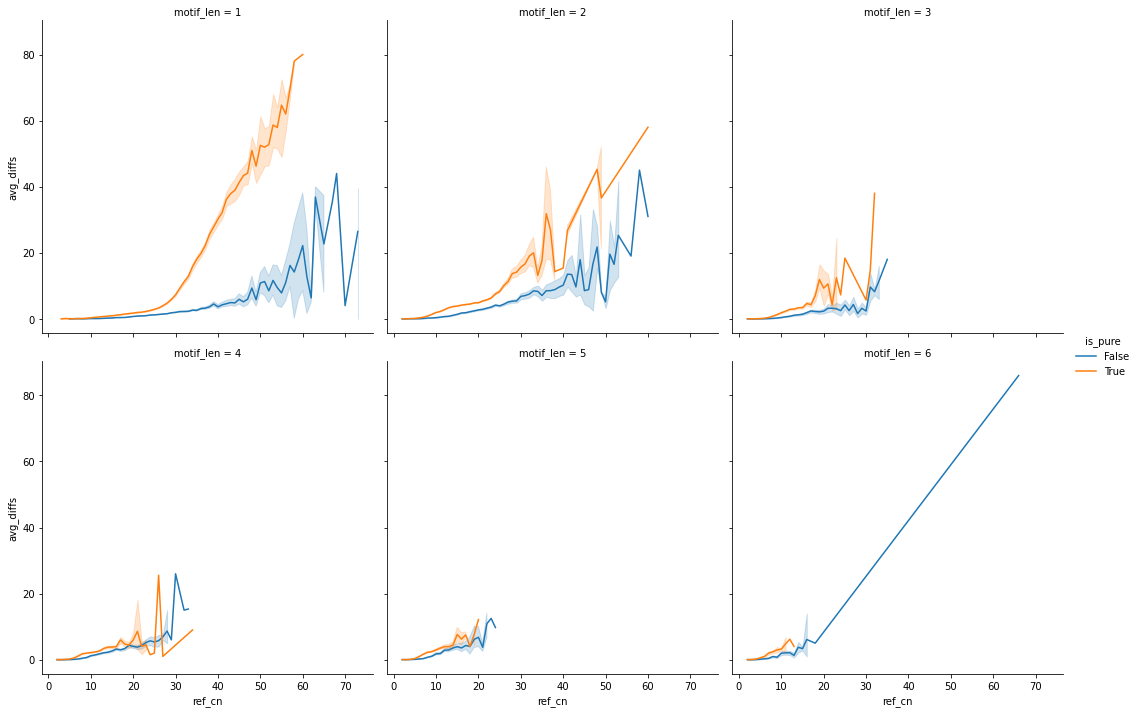

In [13]:
sns.relplot(x="ref_cn", y="avg_diffs", col="motif_len", col_wrap=3, hue="is_pure", kind="line", data=str_df)

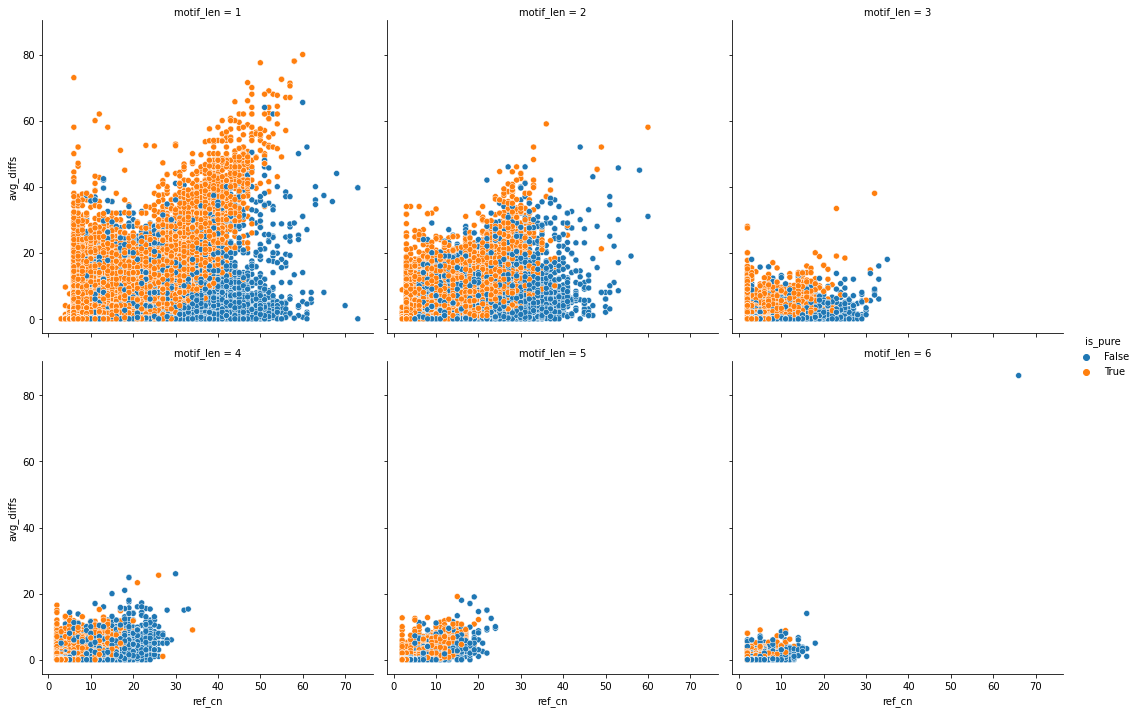

In [27]:
sns.relplot(x="ref_cn", y="avg_diffs", col="motif_len", col_wrap=3, hue="is_pure", data=str_df)

## Look at longest uninterrupted perfect stretch of STR locus instead of complete length

In [22]:
pearsonr(str_df['longest_p_stretch'], str_df['avg_diffs'])

(0.43448669969405573, 0.0)

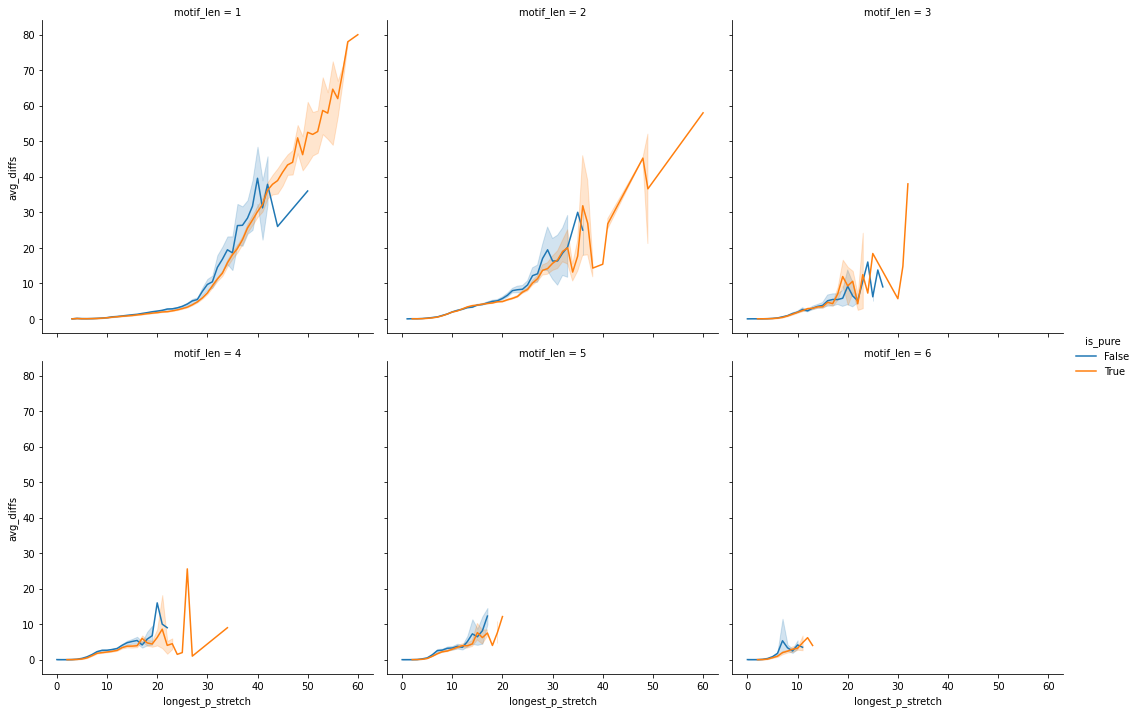

In [11]:
sns.relplot(x="longest_p_stretch", y="avg_diffs", col="motif_len", col_wrap=3, hue="is_pure", kind="line", data=str_df)

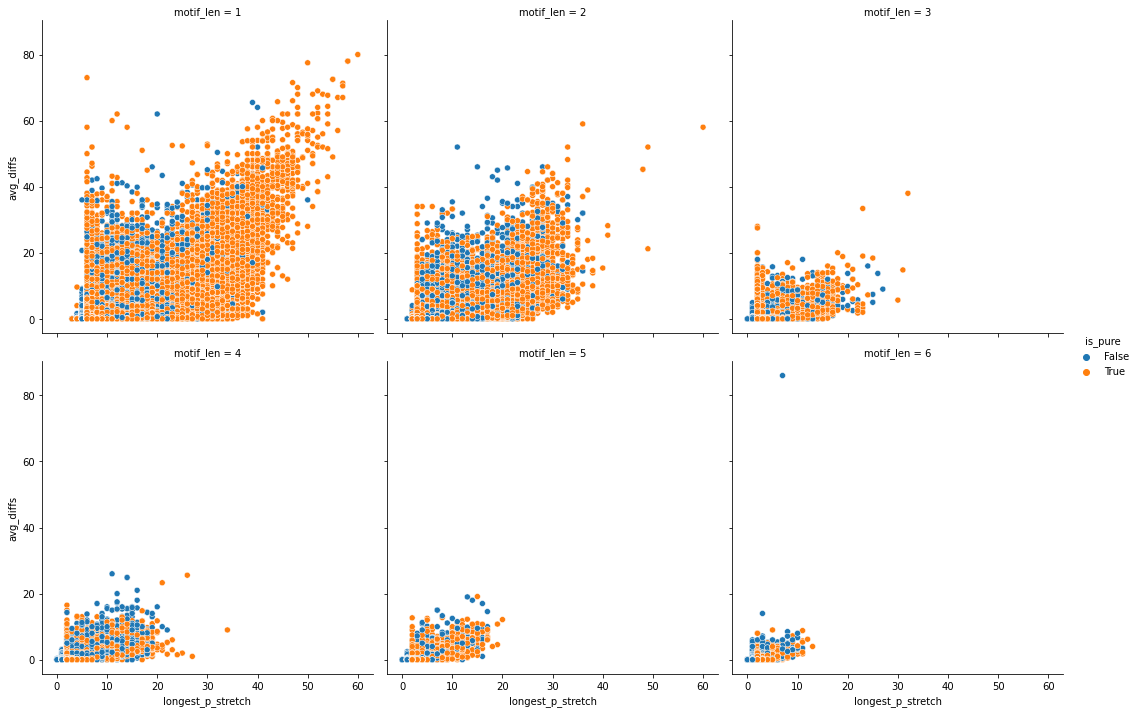

In [12]:
sns.relplot(x="longest_p_stretch", y="avg_diffs", col="motif_len", col_wrap=3, hue="is_pure", data=str_df)